# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [9]:
df = pd.read_csv("grades.csv")

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [10]:
type(df)

pandas.core.frame.DataFrame

In [37]:
df.head()

,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,57
1,胡玉華,10,10,10,8,9,47
2,黃淑婷,13,15,8,11,14,61
3,陳上紫,10,10,8,9,14,51
4,崔靜成,13,12,14,12,13,64


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [12]:
df['國文']

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [13]:
df.國文

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

<Axes: >

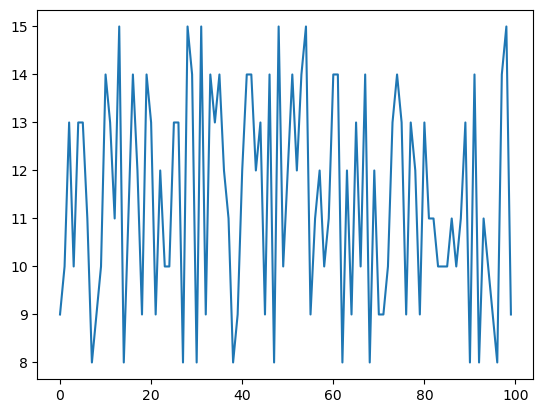

In [14]:
df.國文.plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

<Axes: >

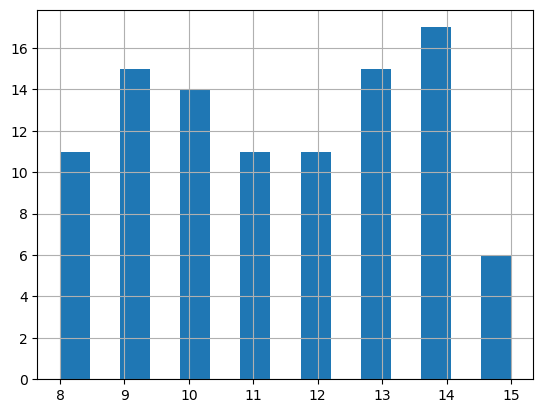

In [15]:
df.國文.hist(bins=15)

## 3 一些基本的資料分析

算平均。

In [16]:
df.國文.mean()

11.39

算標準差。

In [17]:
df.國文.std()

2.1968526614594834

不如就該算的都幫我們算算...

In [18]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [38]:
df.corr()

C:\Users\VivoBook\AppData\Local\Temp\ipykernel_33652\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,國文,英文,數學,自然,社會,總級分
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421,0.317865
英文,0.160158,1.000000,0.025656,0.113929,-0.063512,0.578324
數學,-0.310899,0.025656,1.000000,0.014371,0.041651,0.379013
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594,0.390891
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000,0.422178
總級分,0.317865,0.578324,0.379013,0.390891,0.422178,1.000000


只算兩科間的相關係數當然也可以。

In [20]:
df.國文.corr(df.數學)

-0.310898982217933

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [39]:
df["總級分"] = df.sum(axis = 1)
df.head()

C:\Users\VivoBook\AppData\Local\Temp\ipykernel_33652\1830821528.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df["總級分"] = df.sum(axis = 1)


,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,114
1,胡玉華,10,10,10,8,9,94
2,黃淑婷,13,15,8,11,14,122
3,陳上紫,10,10,8,9,14,102
4,崔靜成,13,12,14,12,13,128


### 【技巧】

有計算的當然也可以的。

In [50]:
df["加權"] = df.國文+df.英文+df.數學*2

In [40]:
df.head()

,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,114
1,胡玉華,10,10,10,8,9,94
2,黃淑婷,13,15,8,11,14,122
3,陳上紫,10,10,8,9,14,102
4,崔靜成,13,12,14,12,13,128


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [43]:
df.sort_values(by='總級分',ascending=False).head(10)

,姓名,國文,英文,數學,自然,社會,總級分
80,施雅鈴,13,15,12,13,13,132
12,李正偉,11,15,11,14,15,132
54,陳怡潔,15,15,9,15,11,130
25,蔡亦瑄,13,13,14,13,12,130
57,胡淳茜,12,15,14,13,11,130
37,曾怡君,11,12,15,13,14,130
48,陳怡婷,15,14,12,9,15,130
64,俞志峰,9,14,13,14,15,130
83,李士賢,10,14,15,13,13,130
87,趙偉希,10,13,14,13,15,130


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [53]:
df2 = df.sort_values(by = ['加權','總級分'],ascending=False)

### 【重點】重設 index

In [54]:

df2.index = range(1,101)
df2.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,118,58
2,胡淳茜,12,15,14,13,11,130,55
3,詹威德,12,13,15,10,14,128,55
4,蔡亦瑄,13,13,14,13,12,130,54
5,李士賢,10,14,15,13,13,130,54


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [55]:
df2[df2.數學==15]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,118,58
3,詹威德,12,13,15,10,14,128,55
5,李士賢,10,14,15,13,13,130,54
7,曾怡君,11,12,15,13,14,130,53
10,林哲法,14,9,15,10,14,124,53
13,陳竹伯,10,12,15,10,14,122,52
15,葉儀依,9,13,15,8,14,118,52
18,周育霖,9,12,15,13,12,122,51
21,張雅彬,10,11,15,12,8,112,51
22,芮秋辛,11,10,15,10,8,108,51


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [57]:
df2[(df2.數學==15)&(df2.英文==15)]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,118,58


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [58]:
df2.drop("總級分",axis=1)
df2

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,118,58
2,胡淳茜,12,15,14,13,11,130,55
3,詹威德,12,13,15,10,14,128,55
4,蔡亦瑄,13,13,14,13,12,130,54
5,李士賢,10,14,15,13,13,130,54
...,...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,102,36
97,胡凱琳,10,8,9,9,15,102,36
98,林建亨,9,11,8,8,11,94,36
99,梁慧君,9,8,8,8,12,90,33


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [59]:
df2.drop("總級分",axis=1,inplace=True)
df2

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [61]:
df2

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


In [62]:
df2.drop(5).head()

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

In [64]:
df2[df2.姓名=='李士賢']
df2

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


In [65]:
df2.drop(df2[df2.姓名=='李士賢'].index)

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [93]:
import pandas_datareader as pdr

df = pdr.get_data_yahoo("AAPL")


AttributeError: module 'pandas_datareader' has no attribute 'get_data_yahoo'

In [97]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
#df = pd.read_csv('data/aapl.csv',index_col="Date")

In [98]:
df.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,114,49
1,胡玉華,10,10,10,8,9,94,40
2,黃淑婷,13,15,8,11,14,122,44
3,陳上紫,10,10,8,9,14,102,36
4,崔靜成,13,12,14,12,13,128,53


#### 只要最後 300 個交易日!

In [99]:
df = df[-300:]
df

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,114,49
1,胡玉華,10,10,10,8,9,94,40
2,黃淑婷,13,15,8,11,14,122,44
3,陳上紫,10,10,8,9,14,102,36
4,崔靜成,13,12,14,12,13,128,53
...,...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,110,37
96,吳筱婷,8,10,14,10,15,114,46
97,陳家銘,14,9,11,8,12,108,45
98,李明威,15,9,8,9,15,112,40


#### 20 日的移動平均

In [101]:
df.Close.plot()

AttributeError: 'DataFrame' object has no attribute 'Close'

In [102]:
df.Close.rolling(20).mean().plot()

AttributeError: 'DataFrame' object has no attribute 'Close'

#### 20 日和 60 日的移動平均

<AxesSubplot:xlabel='Date'>

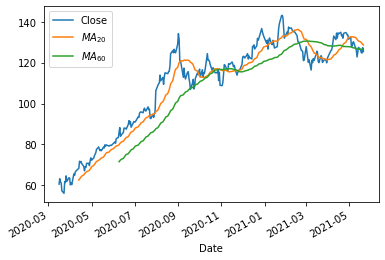

In [68]:
df.Close.plot(legend=True)
df.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
df.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [103]:
close = df.Close.values

len(close)

AttributeError: 'DataFrame' object has no attribute 'Close'

In [104]:
x = close[:-1]

NameError: name 'close' is not defined

In [105]:
y = close[1:]

NameError: name 'close' is not defined

In [106]:
plt.scatter(x,y)

NameError: name 'x' is not defined

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [107]:
mydata = np.random.randn(4,3)

In [108]:
mydata

array([[-0.12128606,  0.1545234 , -1.09285285],
       [ 0.43288814, -0.2363502 ,  1.83098142],
       [ 0.88020116,  1.02859281, -1.01549189],
       [-0.22139152,  0.90166573,  0.82434   ]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [109]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))

In [110]:
df2

,A,B,C
0,-0.121286,0.154523,-1.092853
1,0.432888,-0.236350,1.830981
2,0.880201,1.028593,-1.015492
3,-0.221392,0.901666,0.824340


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [111]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [112]:
df3

,A,B,C
0,-1.756480,0.156057,-1.412231
1,0.012777,-1.602510,-1.053850
2,0.128333,-0.607584,-0.877921


In [113]:
df4 = pd.concat([df2,df3],axis=0)

In [114]:
df4

,A,B,C
0,-0.121286,0.154523,-1.092853
1,0.432888,-0.236350,1.830981
2,0.880201,1.028593,-1.015492
3,-0.221392,0.901666,0.824340
0,-1.756480,0.156057,-1.412231
1,0.012777,-1.602510,-1.053850
2,0.128333,-0.607584,-0.877921


前面我們弄得亂七八糟的 index 重設一下。

In [115]:
df4.index = range(7)

In [116]:
df4

,A,B,C
0,-0.121286,0.154523,-1.092853
1,0.432888,-0.236350,1.830981
2,0.880201,1.028593,-1.015492
3,-0.221392,0.901666,0.824340
4,-1.756480,0.156057,-1.412231
5,0.012777,-1.602510,-1.053850
6,0.128333,-0.607584,-0.877921


#### 横向的貼

In [117]:
df5 = pd.concat([df2,df3],axis=1)

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [118]:
df5

,A,B,C,A,B,C
0,-0.121286,0.154523,-1.092853,-1.756480,0.156057,-1.412231
1,0.432888,-0.236350,1.830981,0.012777,-1.602510,-1.053850
2,0.880201,1.028593,-1.015492,0.128333,-0.607584,-0.877921
3,-0.221392,0.901666,0.824340,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [145]:
df_names = pd.read_csv('names.csv',names=['姓名'])
df_names = pd.read_csv('grades.csv')

In [122]:
df_names

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮
...,...
95,陳君生
96,曾桂甫
97,林欣怡
98,林佳霖


In [147]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                        columns=['國文','英文','數學','社會','自然'])

In [148]:
#df_grades.to_csv('grade2.csv')

In [149]:
df_names = pd.read_csv('grade2.csv')
df_grades

,國文,英文,數學,社會,自然
0,14,7,9,9,14
1,7,11,14,11,6
2,11,6,13,6,7
3,7,6,8,15,7
4,7,11,6,6,14
...,...,...,...,...,...
95,11,9,9,14,9
96,11,12,15,7,6
97,8,13,15,11,6
98,12,13,12,11,8


In [150]:
df_x = pd.concat([df_names,df_grades],axis=1)

In [151]:
df_x

,Unnamed: 0,國文,英文,數學,社會,自然,國文,英文,數學,社會,自然
0,0,12,6,6,8,12,14,7,9,9,14
1,1,10,6,13,13,6,7,11,14,11,6
2,2,11,14,13,13,11,11,6,13,6,7
3,3,10,13,13,14,12,7,6,8,15,7
4,4,8,13,14,9,13,7,11,6,6,14
...,...,...,...,...,...,...,...,...,...,...,...
95,95,11,9,13,14,10,11,9,9,14,9
96,96,14,9,12,11,9,11,12,15,7,6
97,97,15,8,13,14,14,8,13,15,11,6
98,98,8,11,9,7,10,12,13,12,11,8
